In order to judge my model's performance, I want to have a baseline to compare it to. I'll build a simple routine for predicting player performance without ML. Later on, I'll use this baseline to see if my model can do any better than this non-ML solution.

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [5]:
from helpers import score_model

In [2]:
baseline_df = pd.read_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/df_with_rolling_features.pkl')

In [3]:
#simple system for predicting points
baseline_df['predicted_points'] = ((baseline_df['total_points_prev_9']*5) 
                          + (baseline_df['total_points_prev_5'])*3 
                          + (baseline_df['total_points_prev_3']*2))/10

In [4]:
#drop players who averaged less than 45 mins over the past three games

baseline_df['past_three_avg_mins'] = (baseline_df['minutes_prev'] + baseline_df['minutes_prev_2'] + baseline_df['minutes_prev_3'])/3
baseline_df = baseline_df[baseline_df['past_three_avg_mins'] > 45]

In [6]:
score_model(baseline_df)

Overall Score is: 3.9748997847203573
MAE over the entire dataset is: 2.3163683615383768
MAE when a player earns more than 5pts is: 4.804165496311348


<AxesSubplot:xlabel='total_points', ylabel='predicted_points'>

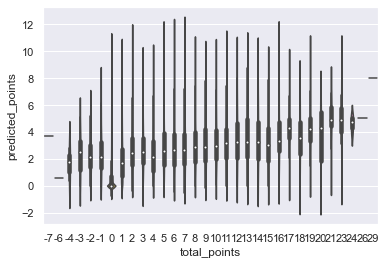

In [33]:
sns.violinplot(x='total_points', y='predicted_points', data=baseline_df)

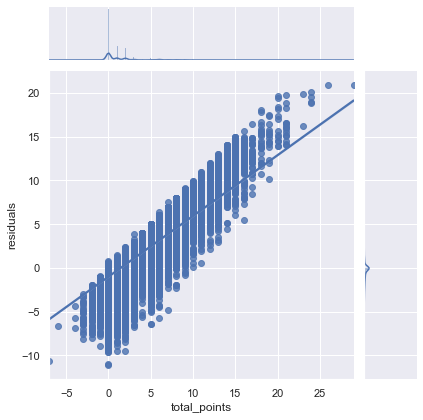

In [35]:
sns.jointplot(x ='total_points', y='residuals', data=baseline_df, kind='reg')